In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# defining different dataset when combining
training['testing'] = 1
test['testing'] = 0
test['Survived'] = np.NaN
df = pd.concat([training,test])

<AxesSubplot:>

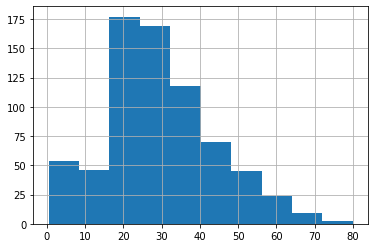

In [4]:
# Looking at histograms
training['Age'].hist()

<AxesSubplot:>

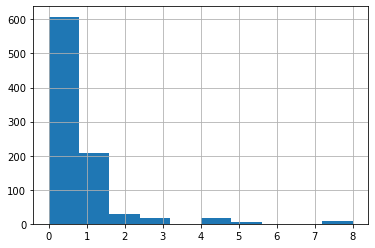

In [5]:
training['SibSp'].hist()

<AxesSubplot:>

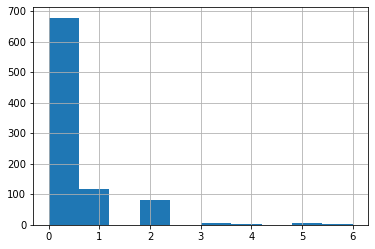

In [6]:
training['Parch'].hist()

<AxesSubplot:>

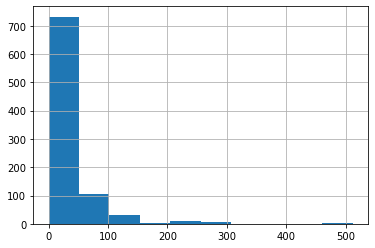

In [7]:
training['Fare'].hist()

In [8]:
training['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [9]:
training['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
# Looking at avg survived for these columns
pd.pivot_table(training, index = 'Survived', values = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


<AxesSubplot:>

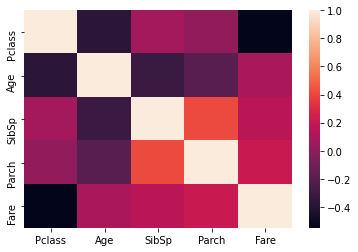

In [11]:
sns.heatmap(training[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr())

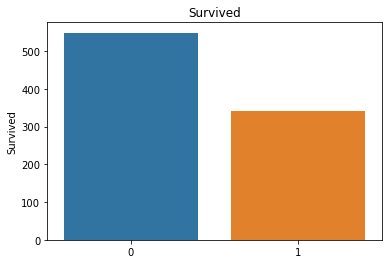

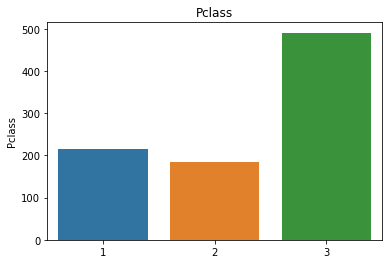

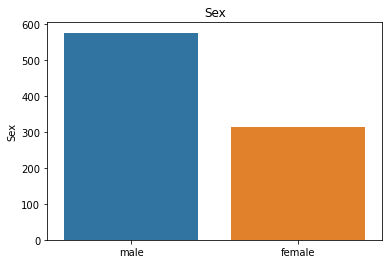

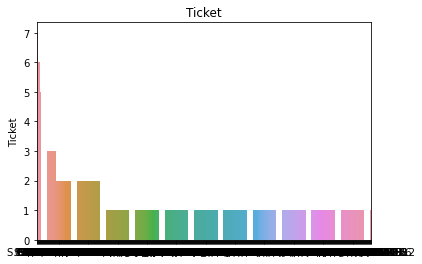

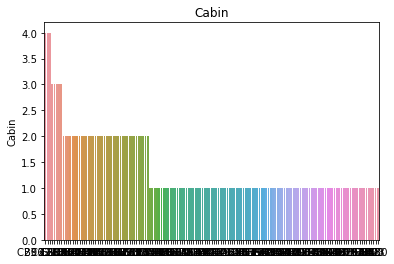

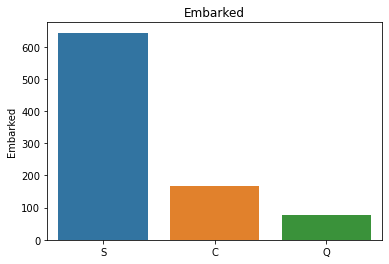

In [15]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
a = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
for i in a.columns:
    sns.barplot(a[i].value_counts().index, a[i].value_counts()).set_title(i)
    plt.show()

# Deeper look into Cabin

In [3]:
# New column for cabin letters
training['cabin_letter'] = training['Cabin'].str[:1]
training['cabin_letter'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin_letter, dtype: int64

In [4]:
# Looking at the survival percentage of cabin letters (there are only 204 cabins in dataset)
count = (training.cabin_letter[training['Survived'] == 1].value_counts() 
         / training['cabin_letter'].notnull().sum())* 100
ratio = pd.DataFrame({'Ratio Percentage' :count})
ratio.head(15)

,Ratio Percentage
B,17.156863
C,17.156863
D,12.254902
E,11.764706
F,3.921569
A,3.431373
G,0.980392


In [5]:
# added value n for all null values
training['cabin_letter'] = training['cabin_letter'].apply(lambda x: 'n' if pd.isna(x) else x)

In [6]:
# changing the df as well
df['cabin_letter'] = df['Cabin'].str[:1]
df['cabin_letter'] = df['cabin_letter'].apply(lambda x: 'n' if pd.isna(x) else x)

In [7]:
# count of survivors for cabin letter
pd.pivot_table(training, index = 'Survived', values = 'Name', columns = 'cabin_letter', aggfunc = 'count')

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [8]:
# New column for cabin numbers
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [9]:
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [10]:
# Looking at the survival percentage of cabin letters (there are only 204 cabins in dataset)
count = (training.cabin_letter[training['Survived'] == 1].value_counts() 
         / training['cabin_multiple'].notnull().sum())* 100
ratio = pd.DataFrame({'Ratio Percentage' :count})
ratio.head(15)

,Ratio Percentage
n,23.120090
B,3.928171
C,3.928171
D,2.805836
E,2.693603
F,0.897868
A,0.785634
G,0.224467


In [11]:
# count of survivors for cabin letter
pd.pivot_table(training, index = 'Survived', values = 'Name', columns = 'cabin_multiple', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


# Separating Fare prices into low, med, and high

In [12]:
# separating fare prices (The middle value is the median and the avg)
training['fare_sep'] = training['Fare'].apply(lambda x: 2 if x > 32 else (1 if x >= 15  and x <= 32 else 0))

In [13]:
training['fare_sep'].value_counts()

0    457
1    223
2    211
Name: fare_sep, dtype: int64

In [14]:
# count of survivors for fare_sep
pd.pivot_table(training, index = 'Survived', values = 'Name', columns = 'fare_sep', aggfunc = 'count')

fare_sep,0,1,2
Survived,,,
0,343,121,85
1,114,102,126


In [15]:
df['fare_sep'] = df['Fare'].apply(lambda x: 2 if x > 32 else (1 if x >= 15  and x <= 32 else 0))

In [16]:
df['fare_sep'] = df['fare_sep'].astype(str)

# Further look into tickets

In [17]:
# looking at ticket number
training['ticket_number'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [18]:
training['ticket_number'].value_counts()

1    661
0    230
Name: ticket_number, dtype: int64

In [19]:
pd.pivot_table(training, index = 'Survived', values = 'Name', columns = 'ticket_number', aggfunc = 'count')

ticket_number,0,1
Survived,,
0,142,407
1,88,254


In [20]:
# looking at ticket letters
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                                   .replace('.','').replace('/','')
                                                   .lower() if len(x.split(' ')[:-1]) >0 else 0)

In [21]:
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
pp             3
wep            3
sopp           3
swpp           2
ppp            2
scah           2
sotono2        2
scahbasle      1
fa             1
scow           1
sca4           1
as             1
sc             1
sop            1
sp             1
fc             1
casoton        1
Name: ticket_letters, dtype: int64

In [22]:
pd.pivot_table(training, index = 'Survived', values = 'Name', columns = 'ticket_letters', aggfunc = 'count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [23]:
df['ticket_number'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                                   .replace('.','').replace('/','')
                                                   .lower() if len(x.split(' ')[:-1]) >0 else 0)

# Family Size

In [24]:
training['FamilySize'] = training['SibSp'] + training['Parch'] + 1

In [25]:
training['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [26]:
pd.pivot_table(training, index = 'Survived', values = 'Name', columns = 'FamilySize', aggfunc = 'count')

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0
1,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN


In [27]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'] = df['FamilySize'].astype(str)

# fixing and categorizing name column

In [28]:
# Getting name title
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [29]:
df['name_title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Mme               1
Jonkheer          1
the Countess      1
Sir               1
Don               1
Lady              1
Capt              1
Dona              1
Name: name_title, dtype: int64

In [30]:
df['name_title'] = df['name_title'].replace(['the Countess'], 'Other')

In [31]:
df['name_title'] = df['name_title'].replace(['Don'], 'Other')

In [32]:
df[['name_title', 'Survived']].groupby(['name_title'], as_index=False).mean()

,name_title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Dona,NaN
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [33]:
# shortening list of name titles (some did not change so i redid the code above) ^
df['name_title'] = df['name_title'].replace(['Lady','Capt', 'Col', 'the Countess'
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'] 
                                             ,'Other')

df['name_title'] = df['name_title'].replace('Mlle', 'Miss')
df['name_title'] = df['name_title'].replace('Ms', 'Miss')
df['name_title'] = df['name_title'].replace('Mme', 'Mrs')
    
df[['name_title', 'Survived']].groupby(['name_title'], as_index=False).mean()

,name_title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


# Preparing data for modelling

In [34]:
# Find ratio of missing values in dataset
count = (df.isnull().sum() / len(df)) * 100
count = count.drop(count[count == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :count})
missing_data.head(20)

,Missing Ratio
Cabin,77.463713
Survived,31.932773
Age,20.091673
Embarked,0.152788
Fare,0.076394


In [35]:
# dropped embarked na values
df.dropna(subset = ['Embarked'], inplace = True)

In [36]:
# Filling in null value for Fare
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

In [37]:
# Filled in NA values for age
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [38]:
count = (df.isnull().sum() / len(df)) * 100
count = count.drop(count[count == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :count})
missing_data.head(20)

,Missing Ratio
Cabin,77.582249
Survived,31.981637


In [39]:
# Turned pclass and Fare into string since it is categorical
df.Pclass = df.Pclass.astype(str)

# Getting Dummies and defining variables

In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'testing',
       'cabin_letter', 'cabin_multiple', 'fare_sep', 'ticket_number',
       'ticket_letters', 'FamilySize', 'name_title'],
      dtype='object')

In [41]:
df['norm_fare'] = np.log(df.Fare+1)

In [42]:
# Getting dummies
dummies = pd.get_dummies(df[['Pclass','Sex','Age', 'SibSp', 'Parch', 'Embarked', 'norm_fare',
                             'cabin_letter', 'cabin_multiple', 'ticket_number',
                             'name_title', 'testing']])

X_train = dummies[dummies.testing == 1].drop(['testing'], axis =1)
X_test = dummies[dummies.testing == 0].drop(['testing'], axis =1)


y_train = df[df.testing==1].Survived

In [43]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'norm_fare', 'cabin_multiple', 'ticket_number',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_letter_A',
       'cabin_letter_B', 'cabin_letter_C', 'cabin_letter_D', 'cabin_letter_E',
       'cabin_letter_F', 'cabin_letter_G', 'cabin_letter_T', 'cabin_letter_n',
       'name_title_Master', 'name_title_Miss', 'name_title_Mr',
       'name_title_Mrs', 'name_title_Other'],
      dtype='object')

In [44]:
X_train.shape

(889, 28)

# Basic Modelling
Link to all models used: https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods

In [45]:
X_train.isnull().sum()

Age                  0
SibSp                0
Parch                0
norm_fare            0
cabin_multiple       0
ticket_number        0
Pclass_1             0
Pclass_2             0
Pclass_3             0
Sex_female           0
Sex_male             0
Embarked_C           0
Embarked_Q           0
Embarked_S           0
cabin_letter_A       0
cabin_letter_B       0
cabin_letter_C       0
cabin_letter_D       0
cabin_letter_E       0
cabin_letter_F       0
cabin_letter_G       0
cabin_letter_T       0
cabin_letter_n       0
name_title_Master    0
name_title_Miss      0
name_title_Mr        0
name_title_Mrs       0
name_title_Other     0
dtype: int64

In [46]:
# xgboost classifier
# Gaussian NB
# MultinomialNB
# Random Forest Classifier
# Gradient Boosting Regressor
# Logistic Regression
# Support Vector Machine
# SGDClassifier
# KNeighborsClassifier
# DecisionTreeClassifier
# GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

In [49]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[15:58:32] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:32] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:32] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:32] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [50]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train, cv = 3)
print(cv)
print(cv.mean())

[0.70707071 0.78716216 0.80067568]
0.7649695149695149


In [51]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train, y_train)
np.mean(cross_val_score(mn, X_train, y_train, cv = 5))

0.7919126515584333

In [52]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
np.mean(cross_val_score(rfc, X_train, y_train, cv = 5))

0.8031676506062337

In [71]:
# Logistic Regression
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
np.mean(cross_val_score(lr, X_train, y_train, cv = 5))

0.8223068621849807

In [55]:
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC(probability = True)
svc.fit(X_train, y_train)
np.mean(cross_val_score(svc, X_train, y_train, cv = 5))

0.7323113057830255

In [56]:
# SGDClassifier
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier()
sc.fit(X_train, y_train)
np.mean(cross_val_score(sc, X_train, y_train, cv = 5))

0.761512092934679

In [57]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
np.mean(cross_val_score(knc, X_train, y_train, cv = 5))

0.811058211134387

In [58]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
np.mean(cross_val_score(dtc, X_train, y_train, cv = 5))

0.7874119215387545

In [59]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
np.mean(cross_val_score(gbc, X_train, y_train, cv = 5))

0.835809052244017

# Top 6 models

In [ ]:
# GradientBoostingClassifier (83.58%)
# DecisionTreeClassifier (78.74%)
# KNeighborsClassifier (81.11%)
# Logistic Regression (82.23%)
# Random Forest Classifier (80.31%)
# SGDClassifier (76.15%)

# Tuning models with gridsearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

In [61]:
# GradientBoostingClassifier (83.58%)
parameter = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': ('auto', 'sqrt', 'log2'), 'max_depth': [5, 7, 9]}
]
gs_gbc = GridSearchCV(GradientBoostingClassifier(), parameter, cv = 3)
gs_gbc.fit(X_train, y_train)
gs_gbc.best_score_

0.8200624867291534

In [62]:
parameter = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}
]
gs_gbc = GridSearchCV(GradientBoostingClassifier(), parameter, cv = 5)
gs_gbc.fit(X_train, y_train)
gs_gbc.best_score_

0.8335301212467467

In [63]:
# DecisionTreeClassifier (78.74%)
parameter = [
    {'criterion': ['gini', 'entropy'], 
     'max_features': ['sqrt', 'auto', 10, 12], 'max_depth': [5, 7, 9]}
]
gs_dt = GridSearchCV(DecisionTreeClassifier(), parameter, cv = 5)
gs_dt.fit(X_train, y_train)
gs_dt.best_score_

0.8189297276709198

In [64]:
parameters = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
gs_dt = GridSearchCV(DecisionTreeClassifier(), parameter, cv = 3)
gs_dt.fit(X_train, y_train)
gs_dt.best_score_

0.8234143234143234

In [67]:
# KNeighborsClassifier (81.11%)
knn = KNeighborsClassifier()
parameter = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
gs_knn = GridSearchCV(knn, parameter, cv = 5, verbose = True, n_jobs = -1)
gs_knn.fit(X_train, y_train)
gs_knn.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


0.812188154637212

In [68]:
# Logistic Regression (82.23%)
parameter = {'max_iter' : [2000],
             'penalty' : ['l1', 'l2'],              
             'C' : np.logspace(-4, 4, 20),
             'solver' : ['liblinear']}
gs_lr = GridSearchCV(LogisticRegression(), parameter, verbose = True, n_jobs = -1, cv = 3)
gs_lr.fit(X_train, y_train)
gs_lr.best_score_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


0.8234181150847818

In [70]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


parameter = {'max_iter' : [1000],
             'penalty' : ['l1', 'l2', 'elasticnet'],
             'C' : np.logspace(-4, 4, 20),
            }
gs_lr = GridSearchCV(LogisticRegression(), parameter, cv = 3)
gs_lr.fit(X_train, y_train)
gs_lr.best_score_

0.8256589923256591

In [72]:
# Random Forest Classifier (80.31%)
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
gs_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
gs_rf.fit(X_train, y_train)
gs_rf.best_score_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


0.833568209229988

In [73]:
# SGDClassifier (76.15%)
parameter = {'penalty' : ['l1', 'l2', 'elasticnet'],

}
gs_sc = GridSearchCV(sc, parameter, cv = 5)
gs_sc.fit(X_train, y_train)
gs_sc.best_score_

0.8032120865866819

# Predictions

In [ ]:
tpred_gbc = gs_gbc.predict(X_test).astype(int)
tpred_dt = gs_dt.predict(X_test).astype(int)
tpred_lr = gs_lr.predict(X_test).astype(int)
tpred_rf = gs_rf.predict(X_test).astype(int)
tpred_sc = gs_sc.predict(X_test).astype(int)

# predictions to dataframe

In [ ]:
final_data = {'PassengerId': test.PassengerId, 'Survived': tpred_gbc}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': tpred_dt}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': tpred_lr}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': tpred_rf}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': tpred_sc}
submission_5 = pd.DataFrame(data=final_data_5)

In [ ]:
submission.to_csv('submission_gbc.csv', index = False)
submission_2.to_csv('submission_dt.csv',index = False)
submission_3.to_csv('submission_lr.csv', index = False)
submission_4.to_csv('submission_rf.csv', index = False)
submission_5.to_csv('submission_sgdc.csv', index = False)

In [51]:
import xgboost as xgb
xgb = XGBClassifier(random_state = 1)

parameter = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, parameter, cv = 5, verbose = True, n_jobs = -1)
clf_xgb.fit(X_train, y_train)
clf_xgb.best_score_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[16:03:48] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8571510188535518